# Pre-Processing
Preprocessing is the process of preparing raw data into a clean and usable format before it is used for analysis, training a machine learning model, or any computational task. It's a crucial step because real-world data is often messy, incomplete, inconsistent, or noisy.

# 🤖 In Machine Learning
Preprocessing ensures that the input data is in a format that a machine learning model can understand and learn from efficiently. **Here’s a table listing the common preprocessing steps for tabular datasets, along with the techniques used for each step:**

| **Step** | **Description** | **Common Techniques** |
|---------|-----------------|------------------------|
| 1. Handling Missing Values | Deal with incomplete data entries | - Remove rows/columns  <br> - Mean/median imputation  <br> - Forward/backward fill |
| 2. Handling Duplicates | Remove repeated records | - `drop_duplicates()` in pandas |
| 3. Handling Outliers | Detect and manage extreme/unusual values | - Z-score  <br> - IQR method  <br> - Clipping/truncation |
| 4. Data Type Conversion | Ensure each column has the correct data type | - Convert strings to numeric, dates, etc. |
| 5. Feature Scaling | Normalize data range for algorithms that are sensitive to scale | - Min-Max Scaling  <br> - Standardization (Z-score) |
| 6. Encoding Categorical Data | Convert categories to numerical values | - One-Hot Encoding  <br> - Label Encoding |
| 7. Feature Engineering | Create new features from existing data | - Extracting date parts  <br> - Polynomial features |
| 8. Feature Selection | Choose the most relevant features | - Correlation analysis  <br> - Recursive feature elimination (RFE) |
| 9. Data Splitting | Split dataset for training and evaluation | - Train/test split  <br> - Cross-validation |
| 10. Balancing Data | Handle class imbalance in target variable | - Oversampling (SMOTE)  <br> - Undersampling |


In [1]:
# Import nessesery modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### Find the information about dataset from the below Link
- https://www.kaggle.com/datasets/rohitudageri/credit-card-details

In [2]:
# Read the csv file as dataframe from github
credit_card_details_df = pd.read_csv('https://github.com/Namachivayam2001/Public_Datasets/raw/main/Credit_card_Details.csv')

In [3]:
credit_card_details_df.head()

,Unnamed: 0,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


### Let's do data inspection

In [4]:
print(f'Number of rows from dataset: {credit_card_details_df.shape[0]}')
print(f'Number of columns from dataset: {credit_card_details_df.shape[1]}')

Number of rows from dataset: 1548
Number of columns from dataset: 20


In [5]:
credit_card_details_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1548 non-null   int64  
 1   Ind_ID           1548 non-null   int64  
 2   GENDER           1541 non-null   object 
 3   Car_Owner        1548 non-null   object 
 4   Propert_Owner    1548 non-null   object 
 5   CHILDREN         1548 non-null   int64  
 6   Annual_income    1525 non-null   float64
 7   Type_Income      1548 non-null   object 
 8   EDUCATION        1548 non-null   object 
 9   Marital_status   1548 non-null   object 
 10  Housing_type     1548 non-null   object 
 11  Birthday_count   1526 non-null   float64
 12  Employed_days    1548 non-null   int64  
 13  Mobile_phone     1548 non-null   int64  
 14  Work_Phone       1548 non-null   int64  
 15  Phone            1548 non-null   int64  
 16  EMAIL_ID         1548 non-null   int64  
 17  Type_Occupatio

## 1. Handling Missing Values

In [6]:
# Create a summary DataFrame
missing_data = pd.DataFrame({
    'Missing Count': credit_card_details_df.isnull().sum(),
    'Missing Percentage': (credit_card_details_df.isnull().sum() / len(credit_card_details_df)) * 100
})

missing_data

,Missing Count,Missing Percentage
Unnamed: 0,0,0.000000
Ind_ID,0,0.000000
GENDER,7,0.452196
Car_Owner,0,0.000000
Propert_Owner,0,0.000000
CHILDREN,0,0.000000
Annual_income,23,1.485788
Type_Income,0,0.000000
EDUCATION,0,0.000000
Marital_status,0,0.000000


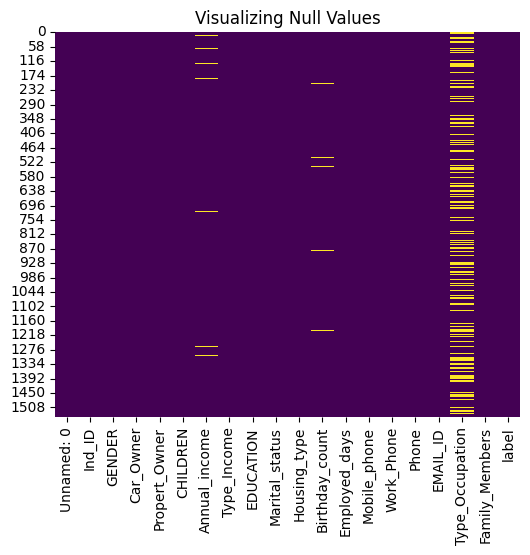

In [7]:
# Let's Visualize the missing values
plt.figure(figsize=(6, 5))
sns.heatmap(credit_card_details_df.isnull(), cbar=False, cmap='viridis')
plt.title('Visualizing Null Values')
plt.show()

#### We can delete the rows where the null values present in "GENDER, Annual_income, Birthday_count" columns, Because these columns having less then 2% of missing data

In [8]:
# get the null value coluns based on missing persentage
null_column_with_less_then_2_pers = missing_data[(missing_data['Missing Percentage'] > 0) & (missing_data['Missing Percentage'] < 2)].index
credit_card_details_df.dropna(subset=null_column_with_less_then_2_pers, axis=0, inplace=True)

In [9]:
print(f'Missing Values columns with less then 2%: {null_column_with_less_then_2_pers}')
print(f'Number of rows after performing dropna(): {credit_card_details_df.shape[0]}')

Missing Values columns with less then 2%: Index(['GENDER', 'Annual_income', 'Birthday_count'], dtype='object')
Number of rows after performing dropna(): 1496


In [10]:
# Create a summary DataFrame for checking null values 
missing_data_after_dropna = pd.DataFrame({
    'Missing Count': credit_card_details_df.isnull().sum(),
    'Missing Percentage': (credit_card_details_df.isnull().sum() / len(credit_card_details_df)) * 100
})

missing_data_after_dropna

,Missing Count,Missing Percentage
Unnamed: 0,0,0.000000
Ind_ID,0,0.000000
GENDER,0,0.000000
Car_Owner,0,0.000000
Propert_Owner,0,0.000000
CHILDREN,0,0.000000
Annual_income,0,0.000000
Type_Income,0,0.000000
EDUCATION,0,0.000000
Marital_status,0,0.000000


In [16]:
print(f'Unique values in Type_Income: {credit_card_details_df.Type_Income.unique()}')
print(f'Unique values in Type_Occupation: {credit_card_details_df.Type_Occupation.unique()}')

Unique values in Type_Income: ['Pensioner' 'Commercial associate' 'Working' 'State servant']
Unique values in Type_Occupation: [nan 'Core staff' 'Cooking staff' 'Laborers' 'Sales staff' 'Accountants'
 'Managers' 'Cleaning staff' 'Drivers' 'Low-skill Laborers'
 'High skill tech staff' 'IT staff' 'Waiters/barmen staff'
 'Security staff' 'Medicine staff' 'Private service staff' 'HR staff'
 'Secretaries' 'Realty agents']


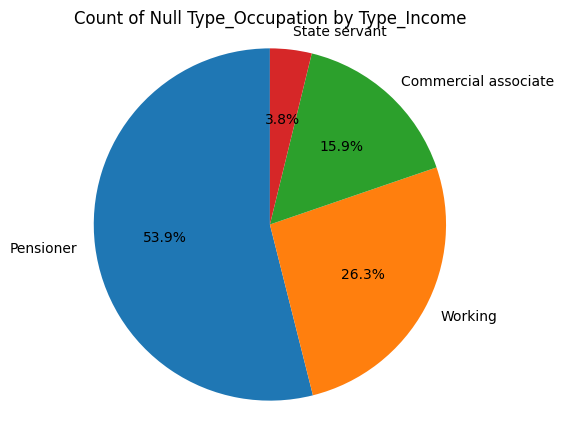

In [22]:
# Step 1: Filter rows where Type_Occupation is null
null_occ_df = credit_card_details_df[credit_card_details_df['Type_Occupation'].isnull()]

# Step 2: Count Type_Income values within those rows
income_counts_with_null_occ = null_occ_df['Type_Income'].value_counts()

# Step 3: Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    income_counts_with_null_occ,
    labels=income_counts_with_null_occ.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Count of Null Type_Occupation by Type_Income')
plt.axis('equal')  # Keep the pie chart circular
plt.show()

In [35]:
credit_card_details_df[credit_card_details_df.Type_Income == 'Working'].head()

,Unnamed: 0,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
11,11,5018498,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-18950.0,-1002,1,1,1,0,Cooking staff,2,1
13,13,5018503,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-18950.0,-1002,1,1,1,0,Cooking staff,2,1
15,15,5021310,M,N,Y,0,270000.0,Working,Secondary / secondary special,Married,House / apartment,-16896.0,-248,1,0,0,0,Laborers,2,1
16,16,5021314,M,N,Y,0,270000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-16896.0,-248,1,0,0,0,Laborers,2,1
20,20,5022053,M,N,N,0,202500.0,Working,Higher education,Single / not married,House / apartment,-12811.0,-4327,1,0,0,0,NaN,1,1


#### Filled missing values in the Type_Occupation column by assigning 'Retired' for Pensioner, 'Laborers' for Working, and using the corresponding Type_Income value for all other cases.

In [36]:
# Fill null values in 'Type_Occupation' based on 'Type_Income'
credit_card_details_df['Type_Occupation'] = credit_card_details_df['Type_Occupation'].fillna(
    credit_card_details_df.apply(
        lambda row: 'Retired' if row['Type_Income'] == 'Pensioner'
        else 'Laborers' if row['Type_Income'] == 'Working'
        else row['Type_Income'], axis=1
    )
)


In [37]:
credit_card_details_df.isna().sum()

Unnamed: 0         0
Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64

In [41]:
# Drop 'Unnamed: 0' column
credit_card_details_df = credit_card_details_df.iloc[:, 1:]

## 2. Handling Duplicates

In [47]:
# Check the duplecate records
credit_card_details_df.duplicated().sum()

np.int64(0)

there is no duplicate records in `credit_card_details_df`

## 3. Handling Outliers

In [48]:
# Get the numarical columns
num_cols = credit_card_details_df.select_dtypes(include=['number']).columns.tolist()
num_cols

['Ind_ID',
 'CHILDREN',
 'Annual_income',
 'Birthday_count',
 'Employed_days',
 'Mobile_phone',
 'Work_Phone',
 'Phone',
 'EMAIL_ID',
 'Family_Members',
 'label']

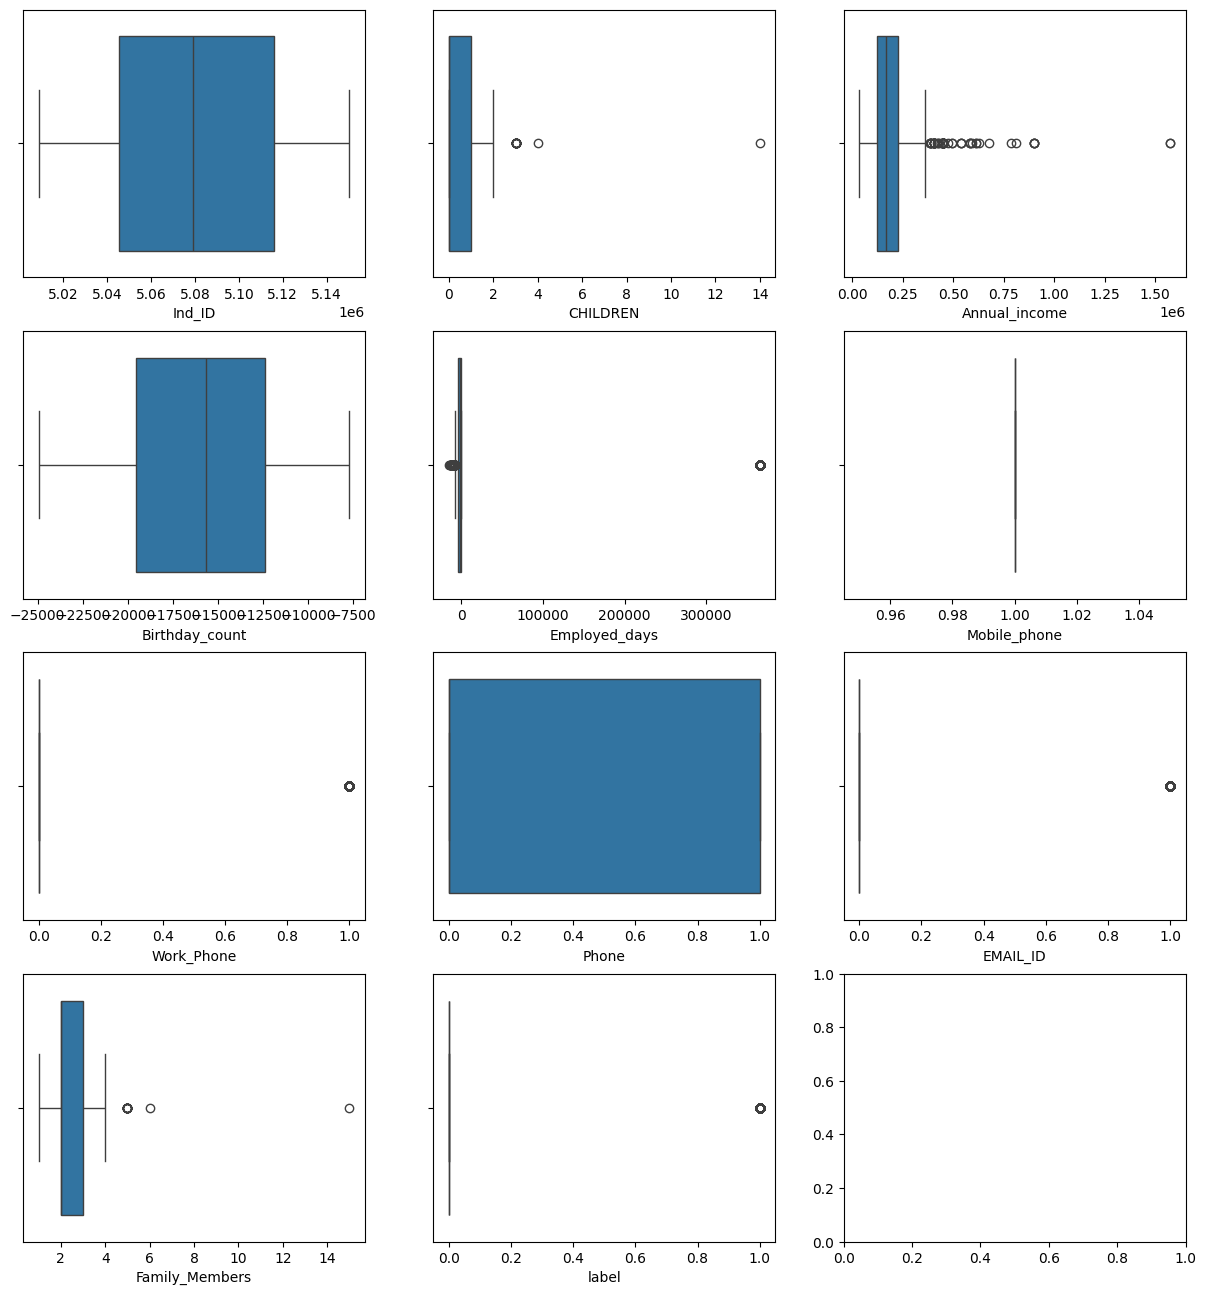

In [49]:
# Visualize the outliers using boxplot
cols = 3
rows = (len(num_cols) + cols -1) // cols

fig, axis = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
axis = axis.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=credit_card_details_df[col], ax=axis[i])

plt.show()